<a href="https://colab.research.google.com/github/lucas-tebet/data_science/blob/master/Iris_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Machine Learning model with Decision Tree

Using the **Iris** dataset from Scikit-learn, I've plotted scatter plots to visualize how the variables are distributed. 

Also, predicting the species from the input values of sepal length, sepal width, petal lenght and petal width. All of them showed in the graphics. 

1. importing the labraries

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

2. Instantiating the scikit-learn data as `iris`.

In [14]:
iris = load_iris()

3. Creating the Decision Tree model itself and getting the accuracy of it.

In [15]:
model = DecisionTreeClassifier(random_state=1)

X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y)

model = model.fit(X_train, y_train)

y_pred = model.predict(X_test)

acc = accuracy_score(y_test, y_pred)

print(acc)

0.8947368421052632


4. Understanding the values of each species.

In [16]:
print('Setosa example\t\t',X[10])
print('Versicolor example\t',X[75])
print('Virginica example\t',X[122])

Setosa example		 [5.4 3.7 1.5 0.2]
Versicolor example	 [6.6 3.  4.4 1.4]
Virginica example	 [7.7 2.8 6.7 2. ]


5. Inputting the values so the model can predict which species it is.

In [17]:
sl = float(input('Sepal lenght: '))
sw = float(input('Sepal width: '))
pl = float(input('Petal lenght: '))
pw = float(input('Petal width: '))

Sepal lenght: 6
Sepal width: 3
Petal lenght: 5
Petal width: 1.8


6. Creating an array with the input values.

In [18]:
X_new = np.array([[sl, sw, pl, pw]])

7. Printing the predicted species. 

In [19]:
if model.predict(X_new)[0] == 0:
  print('The species is Setosa')
else:
  if model.predict(X_new)[0] == 1:
    print('The species is Versicolor')
  else:
    if model.predict(X_new)[0] == 2:
      print('The species is Virginica')

The species is Virginica


8. Creating an new dataset, now with the input values as well.

In [20]:
data_new = np.concatenate([iris.data, X_new])

9. Visualizing the scatter plots and identifying where the input values match.

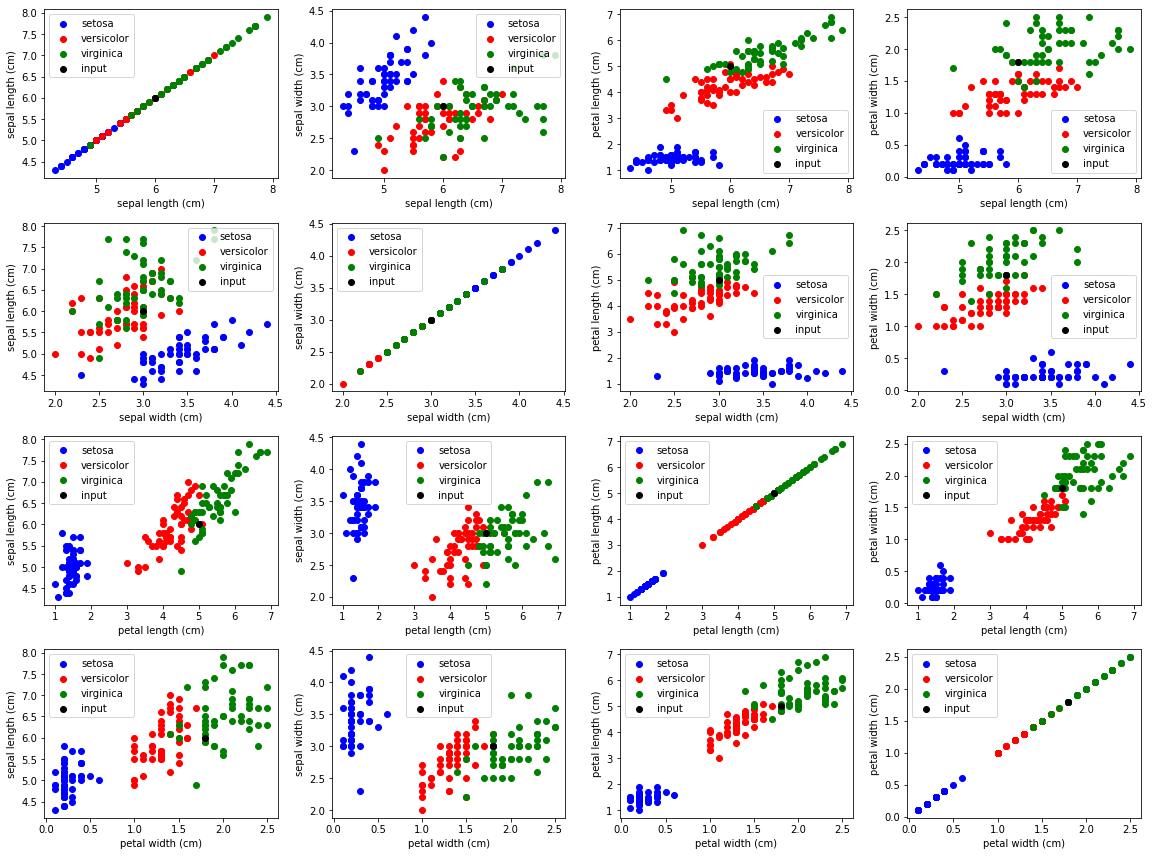

In [25]:
fig, ax = plt.subplots(nrows = len(iris.feature_names), ncols= len(iris.feature_names), figsize = (16,12))

labels = range(len(iris.target_names))
colors = ['blue', 'red', 'green']

for X in range(len(iris.feature_names)):

  for y in range(len(iris.feature_names)):

    for label, color in zip (labels, colors):
      ax[X,y].scatter(iris.data[iris.target == label, X],
                      iris.data[iris.target == label, y],
                      label = iris.target_names[label],
                      c = color)
    ax[X,y].scatter(data_new[-1, X],
                    data_new[-1, y],
                    label = 'input',
                    c = 'black')

    ax[X,y].set_xlabel(iris.feature_names[X])
    ax[X,y].set_ylabel(iris.feature_names[y])   
    ax[X,y].legend()

fig.tight_layout()
plt.show()